In [ ]:
!pip install -q yfinance

     |████████████████████████████████| 50 kB 2.5 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 37.5 MB/s 
     |████████████████████████████████| 110 kB 61.8 MB/s 
     |████████████████████████████████| 128 kB 57.0 MB/s 
     |████████████████████████████████| 112 kB 59.5 MB/s 


In [ ]:
!pip install --upgrade pandas-datareader
!pip install fix-yahoo-finance==0.1.30


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

import yfinance as yf

# For time stamps
from datetime import datetime

#importing warnings to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) #taking 1 year of data range from 2021 to 2022

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name
    
df = pd.concat(company_list, axis = 0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-12-22,173.039993,175.860001,172.149994,175.639999,174.626495,92135300,APPLE
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262817,68356600,APPLE
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,APPLE
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300,APPLE
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,APPLE
...,...,...,...,...,...,...,...
2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146044000,AMAZON
2022-12-19,87.510002,87.629997,84.510002,84.919998,84.919998,83531500,AMAZON
2022-12-20,85.330002,86.610001,84.330002,85.190002,85.190002,74348300,AMAZON


In [ ]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,128.376449,130.477303,125.970338,128.140364,128.140364,7.561539e+07
std,24.081207,24.149865,23.973831,24.072515,24.072515,3.417678e+07
min,85.330002,85.680000,82.250000,83.790001,83.790001,3.508860e+07
25%,110.389999,113.230003,107.453499,110.400002,110.400002,5.463800e+07
50%,124.053497,125.610001,121.349998,124.629997,124.629997,6.637530e+07
75%,150.018494,152.982498,147.353500,150.197495,150.197495,8.501110e+07
max,171.037003,172.942993,170.149994,171.068497,171.068497,2.726620e+08


In [ ]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-12-22 to 2022-12-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


**Historical View of closing price**

In [ ]:
Closing_plot = px.area(df, facet_col = 'company_name', x = df.index, y = 'Adj Close', facet_col_wrap = 4, color = 'company_name', template= 'plotly_dark')


In [ ]:
Closing_plot.show()

**Sales volume per stock**

In [ ]:
Volume_plot = px.area(df, facet_col = 'company_name', x = df.index, y = 'Volume', facet_col_wrap = 4, color = 'company_name', template = 'plotly_dark')
Volume_plot.show()

**Daily return**

In [ ]:
df['Daily Return'] = df['Adj Close'].pct_change()
fig = px.line(df, facet_col = 'company_name', x = df.index, y = 'Daily Return', facet_col_wrap = 12, color = 'company_name', template = 'plotly_dark')
fig.show()




In [ ]:
Daily_return = px.histogram(df, x = 'company_name', y = 'Daily Return', color = 'company_name', template = 'plotly_dark')
Daily_return.show()

**Correlations between stocks**

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
#closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df = yf.download(tech_list, start= '2021-01-01',end= datetime.now())['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
# Make a new tech returns DataFrame
tech_rtn = closing_df.pct_change()
tech_rtn.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.010004,0.007337,0.000965
2021-01-06,-0.033662,-0.024897,-0.003234,-0.025929
2021-01-07,0.034123,0.007577,0.029943,0.028457
2021-01-08,0.008631,0.006496,0.011168,0.006093


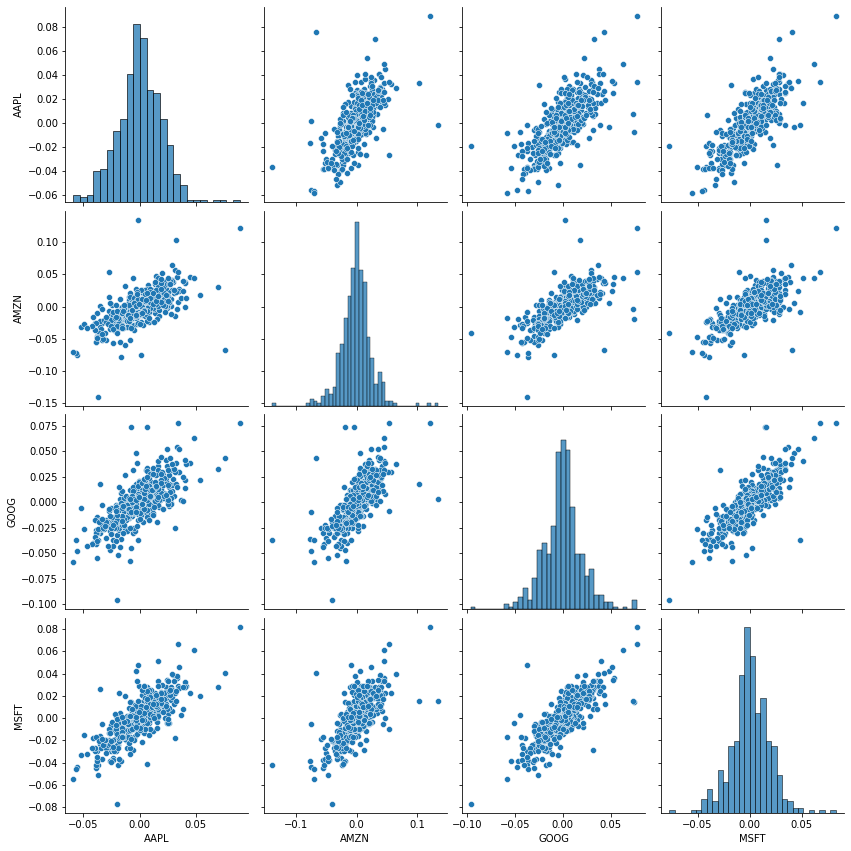

In [ ]:
sns.pairplot(tech_rtn, size=3)

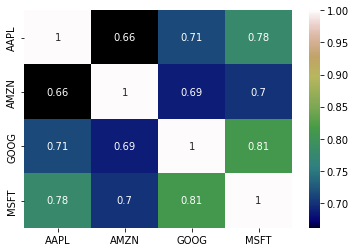

In [ ]:
sns.heatmap(tech_rtn.corr(), annot = True, cmap = 'gist_earth')

From the heatmap it is concluded that Microsoft and google have the strong correlation for the returns. It's also interesting to see that all the technology comapnies are positively correlated.

**Predicting Microsoft closing price**

In [ ]:
# Get the stock quote
df_predict = yf.download('MSFT', start= '2007-12-01',end= '2009-07-01')

# Show the data
df_predict


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-03,33.500000,33.639999,32.680000,32.919998,24.167330,61770600
2007-12-04,32.740002,33.240002,32.630001,32.770000,24.057220,54801500
2007-12-05,33.139999,34.520000,33.029999,34.150002,25.070305,84894700
2007-12-06,34.259998,34.610001,33.869999,34.549999,25.363953,49209700
2007-12-07,34.610001,34.700001,34.220001,34.529999,25.349264,40771000
...,...,...,...,...,...,...
2009-06-24,23.450001,23.750000,23.360001,23.469999,17.780329,54287700
2009-06-25,23.430000,23.920000,23.200001,23.790001,18.022753,57724300
2009-06-26,23.570000,23.690001,23.320000,23.350000,17.689417,65126400


In [ ]:
fig = px.area(df_predict, y = 'Close', facet_col_wrap = 12, template = 'plotly_dark', title= 'Close Price History')
fig.show()

In [ ]:
# Create a new dataframe with only the 'Close' column 
data = df_predict.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

378

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(397, 1)

In [ ]:
scaled_data

array([[0.82805208],
       [0.82106244],
       [0.88536817],
       [0.9040074 ],
       [0.90307541],
       [0.913793  ],
       [0.88303812],
       [0.90027962],
       [0.93522836],
       [0.93942222],
       [0.89655167],
       [0.91286119],
       [0.91519107],
       [0.94920782],
       [0.97437096],
       [0.99860211],
       [1.        ],
       [0.9701771 ],
       [0.97716674],
       [0.9529356 ],
       [0.93522836],
       [0.942218  ],
       [0.89608577],
       [0.90680336],
       [0.85274931],
       [0.89888155],
       [0.89375589],
       [0.8741845 ],
       [0.89655167],
       [0.87837836],
       [0.84249763],
       [0.83690588],
       [0.83224594],
       [0.78331774],
       [0.78191985],
       [0.84342962],
       [0.82898407],
       [0.81873256],
       [0.81314064],
       [0.79450141],
       [0.81314064],
       [0.71295435],
       [0.70083878],
       [0.64864862],
       [0.62301958],
       [0.60438027],
       [0.62488347],
       [0.608

In [ ]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
            
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #adding the batch size axis
x_train.shape


(318, 60, 1)

In [ ]:
from keras.layers.regularization.dropout import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))


#Adding the second LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
hist = model.fit(x_train, y_train, batch_size=35, epochs=20, verbose=2)

Epoch 1/20
10/10 - 5s - loss: 0.0618 - 5s/epoch - 500ms/step
Epoch 2/20
10/10 - 1s - loss: 0.0138 - 1s/epoch - 101ms/step
Epoch 3/20
10/10 - 1s - loss: 0.0069 - 924ms/epoch - 92ms/step
Epoch 4/20
10/10 - 1s - loss: 0.0054 - 934ms/epoch - 93ms/step
Epoch 5/20
10/10 - 1s - loss: 0.0034 - 948ms/epoch - 95ms/step
Epoch 6/20
10/10 - 1s - loss: 0.0038 - 925ms/epoch - 92ms/step
Epoch 7/20
10/10 - 1s - loss: 0.0041 - 936ms/epoch - 94ms/step
Epoch 8/20
10/10 - 1s - loss: 0.0034 - 924ms/epoch - 92ms/step
Epoch 9/20
10/10 - 1s - loss: 0.0037 - 958ms/epoch - 96ms/step
Epoch 10/20
10/10 - 1s - loss: 0.0035 - 930ms/epoch - 93ms/step
Epoch 11/20
10/10 - 1s - loss: 0.0036 - 951ms/epoch - 95ms/step
Epoch 12/20
10/10 - 1s - loss: 0.0032 - 962ms/epoch - 96ms/step
Epoch 13/20
10/10 - 1s - loss: 0.0030 - 941ms/epoch - 94ms/step
Epoch 14/20
10/10 - 1s - loss: 0.0035 - 917ms/epoch - 92ms/step
Epoch 15/20
10/10 - 1s - loss: 0.0031 - 918ms/epoch - 92ms/step
Epoch 16/20
10/10 - 1s - loss: 0.0031 - 925ms/epoch -

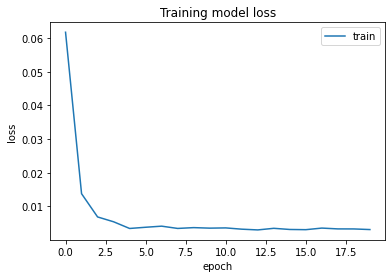

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc ='upper right')
plt.show()

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 897ms/step


1.3367663594805321

RMSE - 0.7957

In [ ]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 40ms/step


In [ ]:
predicted_price = scaler.inverse_transform(y_pred)

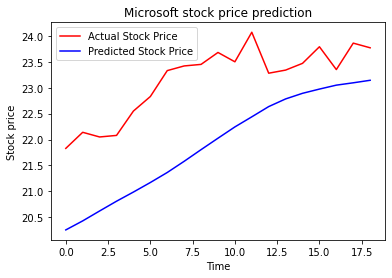

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Microsoft stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

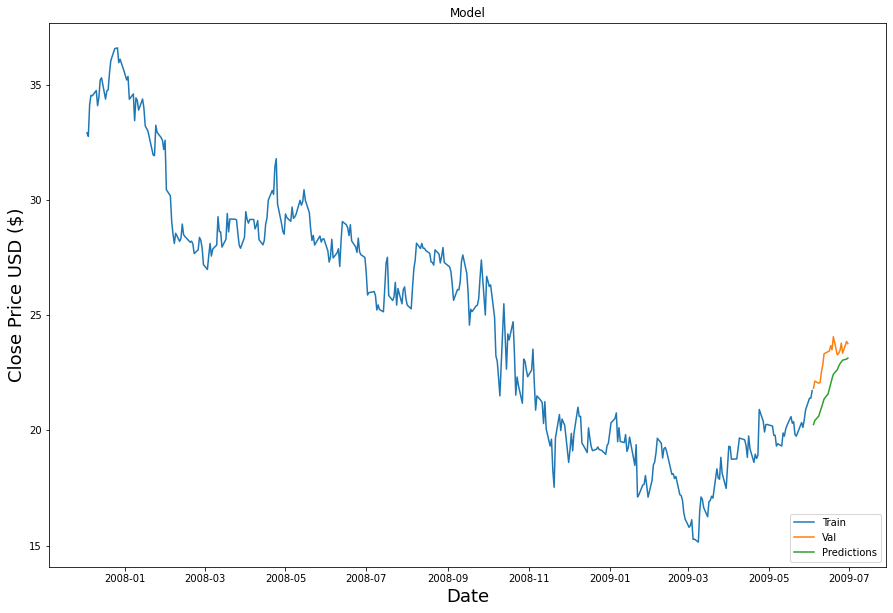

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2009-06-04,21.830000,20.257154
2009-06-05,22.139999,20.431248
2009-06-08,22.049999,20.622581
2009-06-09,22.080000,20.810732
2009-06-10,22.549999,20.987736
2009-06-11,22.830000,21.171532
2009-06-12,23.330000,21.364819
2009-06-15,23.420000,21.580601
2009-06-16,23.450001,21.805426
